In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Online_Retail.csv', encoding='latin1')

In [18]:
data = data.dropna(subset=['CustomerID'])
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

customer_data = data.groupby('CustomerID')['TotalAmount'].sum().reset_index()

mean_value = customer_data['TotalAmount'].mean()
median_value = customer_data['TotalAmount'].median()
mode_value = customer_data['TotalAmount'].mode()[0]

print("Mean Spend:", round(mean_value, 2))
print("Median Spend:", round(median_value, 2))
print("Mode Spend:", round(mode_value, 2))

customer_data['Segment'] = ['High Spender' if amount > mean_value else 'Low Spender' for amount in customer_data['TotalAmount']]
print(customer_data['Segment'].value_counts())



Mean Spend: 2054.27
Median Spend: 674.48
Mode Spend: 76.32
Segment
Low Spender     3467
High Spender     871
Name: count, dtype: int64


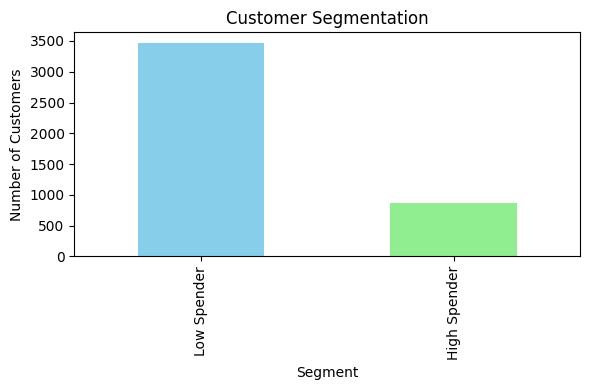

In [17]:
plt.figure(figsize=(6, 4))
customer_data['Segment'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()